# Book-crossing dataset
In this dataset, 0 represents an implicit rating

In [1]:
import numpy as np
import pandas as pd
from interactions_data import make_long
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import zipfile
import os, shutil

In [2]:
try:
    shutil.rmtree('./bookcrossing')
    print('bookcrossing directory already exists, removing it first')
except:
    print('no existing directory found, all good')

# stable link for dataset
url = 'http://www2.informatik.uni-freiburg.de/~cziegler/BX/'
filename = 'BX-CSV-Dump.zip'

# download zip file from link
print('downloading and saving dataset from book-crossing stable link...')
downloaded = urlopen(url + filename)
buf = downloaded.read()

# save file and extract contents
with open(filename, 'wb') as f:
    f.write(buf)

print('unzipping contents')
with zipfile.ZipFile(filename) as zip:
    zip.extractall('./bookcrossing')
    
# add .txt to readme file
# os.rename('./ml-1m/README', './ml-1m/README.txt')

# remove zip file from directory
print('deleting zip file')
os.remove(filename)

bookcrossing directory already exists, removing it first
downloading and saving dataset from book-crossing stable link...
unzipping contents
deleting zip file


In [3]:
path = 'bookcrossing/'

In [4]:
df = pd.read_csv(path+'BX-Book-Ratings.csv',sep=';',encoding='latin')
df.columns = ['user_id','book_id','rating']
df.head()

,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
df.shape

(1149780, 3)

### Encode IDs from 0-n

In [6]:
def create_encoder(data, start=0):

    encoder = {}

    idx = start
    for item in data:

        if item not in encoder.keys():
            encoder[item] = idx
            idx += 1

    return encoder

In [7]:
user_ids = df['user_id'].unique()
book_ids = df['book_id'].unique()

# create ID encoders
user_encoder = create_encoder(user_ids)
book_encoder = create_encoder(book_ids)

In [8]:
# replace all IDs with sequential 0-N IDs
df['user_id'] = df['user_id'].apply(lambda x: user_encoder[x])
df['book_id'] = df['book_id'].apply(lambda x: book_encoder[x])

In [9]:
n_users = df.user_id.nunique()
n_items = df.book_id.nunique()
max_score = df.rating.max()
min_score = df.rating.min()

In [10]:
print(n_users, df.user_id.max())
print(n_items, df.book_id.max())
print(min_score, max_score)

105283 105282
340556 340555
0 10


## EDA

In [11]:
df.head()

,user_id,book_id,rating
0,0,0,0
1,1,1,5
2,2,2,0
3,3,3,3
4,3,4,6


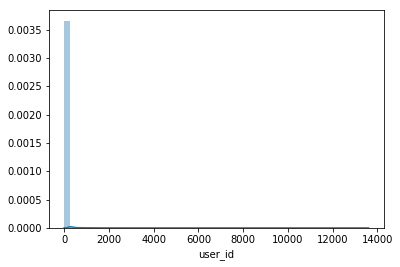

Min ratings by single user: 1
Max ratings by single user: 13602
Avg number of ratings per user: 11


In [12]:
user_counts = df['user_id'].value_counts()

sns.distplot(user_counts)
plt.show()

# user with fewest ratings
print('Min ratings by single user:',
      user_counts.min())

# user with most ratings
print('Max ratings by single user:',
      user_counts.max())

# average number of ratings per user
print('Avg number of ratings per user:',
      round(user_counts.mean()))

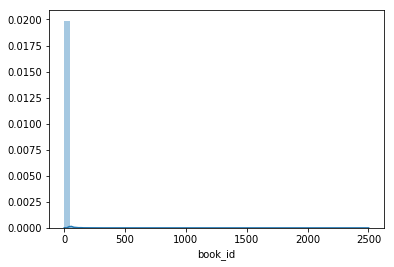

Min ratings of single book: 1
Max ratings of single book: 2502
Avg number of ratings per book: 3


In [13]:
book_counts = df['book_id'].value_counts()

sns.distplot(book_counts)
plt.show()

# book with fewest ratings
print('Min ratings of single book:',
      book_counts.min())

# book with most ratings
print('Max ratings of single book:',
      book_counts.max())

# average number of ratings per book
print('Avg number of ratings per book:',
      round(book_counts.mean()))

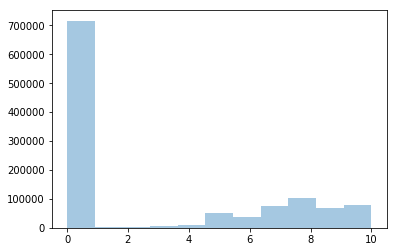

In [24]:
sns.distplot(df['rating'].values, kde=False, bins=11)
plt.show()

print('Avg rating:', round(df['rating'].mean(),2))

### Train / test split

In [15]:
train, test, _, _ = train_test_split(df, df.rating,
                                     test_size = .2,
                                     random_state=42)

In [16]:
train.shape

(919824, 3)

In [17]:
test.shape

(229956, 3)

In [18]:
train.to_csv(path+'train.csv', index=False)
test.to_csv(path+'test.csv', index=False)

### remove all other files

In [19]:
folder = os.listdir('./'+path)

for item in folder:
    if not (item.endswith("train.csv") or item.endswith("test.csv")):
        os.remove(os.path.join('./'+path, item))